# 🛳️ Titanic Data Exploration

A beginner-level exploratory data analysis using the Titanic dataset.  
This notebook investigates key features such as `Sex`, `Pclass`, and `Age`  
to uncover survival patterns and build a foundation for further analysis.

---

## 🎯 Purpose

To understand survival patterns in the Titanic dataset  
based on variables like sex, passenger class, and age.

## 📦 Dataset

The dataset used is from [Kaggle](https://www.kaggle.com/c/titanic)  
via public repository: [Data Science Dojo GitHub](https://github.com/datasciencedojo/datasets)

📦 1. Load the Dataset

In [68]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style='whitegrid')

df = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


📝 2. Column Descriptions
## Feature Overview

| Column | Description |
|--------|-------------|
| PassengerId | Unique ID for each passenger |
| Survived    | Survival status (0 = No, 1 = Yes) |
| Pclass      | Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd) |
| Name        | Full name of the passenger |
| Sex         | Gender |
| Age         | Age in years |
| SibSp       | # of siblings/spouses aboard |
| Parch       | # of parents/children aboard |
| Ticket      | Ticket number |
| Fare        | Passenger fare |
| Cabin       | Cabin number |
| Embarked    | Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton) |

📊 3. Basic Statistics & Missing Values

In [69]:
# Summary info
df.info()

# Descriptive statistics
df.describe()

# Check missing values
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

📈 4. Key Feature Visualizations

4-1. Survival by Sex

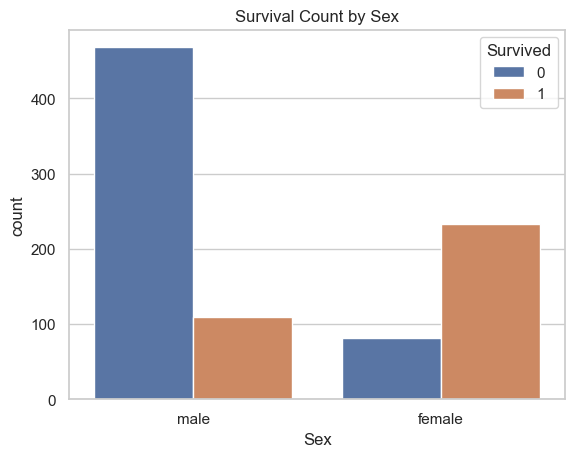

In [70]:
# Survival count by sex
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title('Survival Count by Sex')
plt.show()

- Most males did not survive, while most females did survive.

- The significantly higher survival rate for females suggests that gender played an important role in survival on the Titanic.

4-2. Survival by Passenger Class (Pclass)

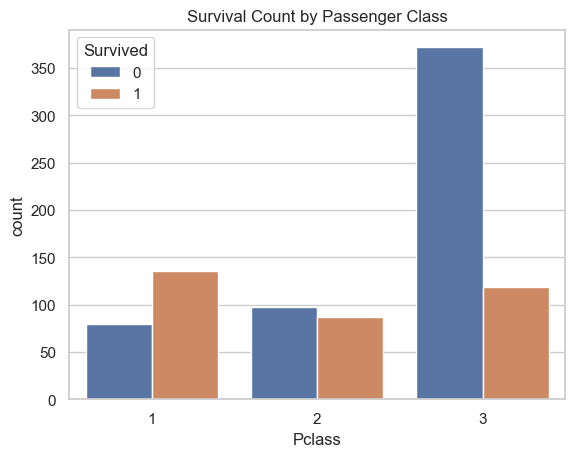

In [71]:
# Survival count by Pclass
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title('Survival Count by Passenger Class')
plt.show()

- First-class passengers exhibited the highest survival rate, suggesting priority access to lifeboats and better overall conditions.

- Third-class passengers had the lowest survival rate, indicating limited access to rescue resources during the disaster.

- This distribution highlights the strong correlation between socioeconomic status (as represented by Pclass) and likelihood of survival.

4-3. Survival by Age (Age)

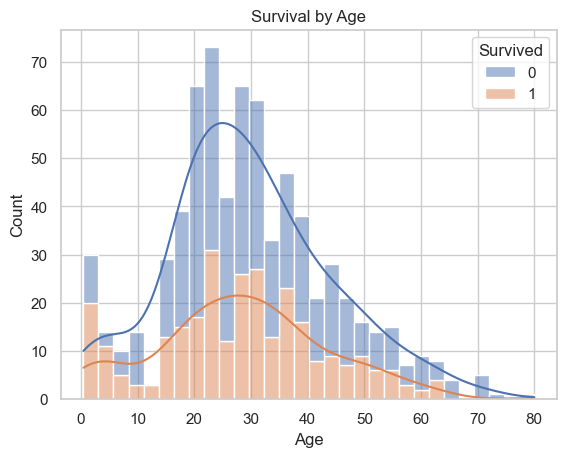

In [72]:
sns.histplot(data=df, x='Age', hue='Survived', bins=30, kde=True, multiple='stack')
plt.title('Survival by Age')
plt.show()

- Children (under ~10 years) showed relatively high survival rates, likely due to evacuation priority during the disaster.

- Young adults (20s–30s) made up the largest portion of passengers, yet their survival rate was lower than expected given their numbers.

- Elderly passengers (60+) exhibited very low survival rates, possibly due to limited mobility or being lower priority during evacuation efforts.

### 📐 Quantifying Insights

To deepen our initial observations,  
we calculate actual survival rates by group.

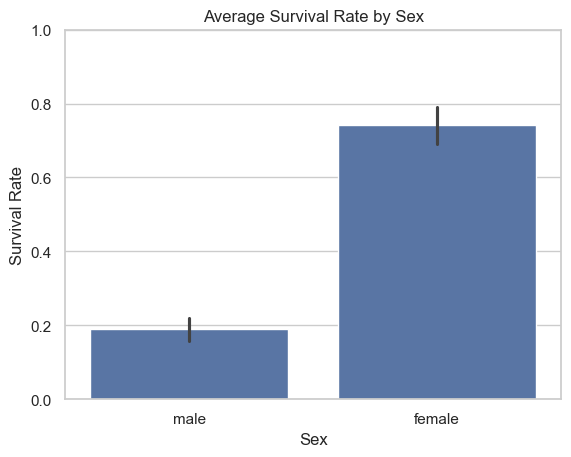

In [73]:
sns.barplot(x='Sex', y='Survived', data=df, estimator='mean')
plt.title('Average Survival Rate by Sex')
plt.ylabel('Survival Rate')
plt.ylim(0, 1)
plt.show()

- As seen earlier, the total number of survivors was higher among females,
but this chart presents the survival rate more clearly.

- Over 75% of women survived, while less than 20% of men did.

- This reflects how social norms and evacuation protocols that prioritized women
translated into a stark difference in survival probability by gender.

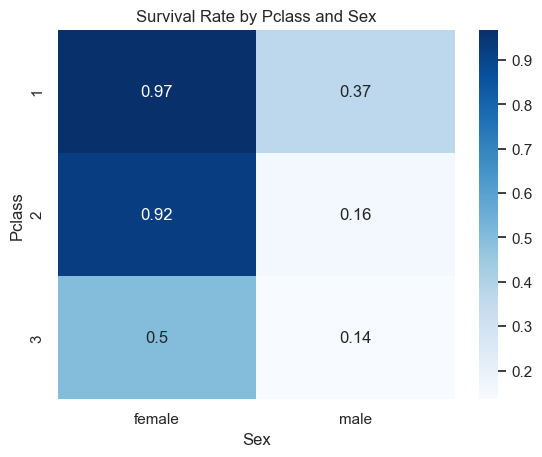

In [74]:
sns.heatmap(df.pivot_table(index='Pclass', columns='Sex', values='Survived'), annot=True, cmap='Blues')
plt.title('Survival Rate by Pclass and Sex')
plt.show()

- This heatmap visualizes survival rates across both gender and passenger class.
While female passengers had high survival rates overall, those in 3rd class experienced a dramatic drop — from 97% in 1st class to 50% in 3rd class.

- Male survival rates remained low across all classes, but were still higher in 1st class (37%) compared to 3rd class (14%).

- These patterns clearly demonstrate that socioeconomic status, as represented by Pclass, played a significant role in survival, even within the same gender.

## 🧠 Summary

- **Sex**: Females exhibited a substantially higher survival rate than males.
This gender gap was especially pronounced in 1st and 2nd class passengers.
- **Pclass**: Survival rates declined sharply with lower passenger class.
Even among females, those in 3rd class had significantly lower survival chances, revealing class-based disparities.
- **Age**: Most passengers were in their 20s to 30s.
Children under 10 had relatively high survival rates, while elderly passengers (60+) faced much lower survival rates.

This exploratory analysis revealed how key factors like sex, class, and age influenced survival on the Titanic.
In the next notebook, we’ll investigate how additional variables such as
SibSp, Parch, Fare, and Embarked contribute to survival outcomes and interact with each other.